<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:
# 1. boxplot of Median value of owner-occupied homes 
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median value of owner-occupied homes')
pyplot.xlabel('Median Value (in $1000s)')
pyplot.show()

In [ ]:
# 1. boxplot of Median value of owner-occupied homes 
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median value of owner-occupied homes')
pyplot.xlabel('Median Value (in $1000s)')
pyplot.show()

In [ ]:
# 1. boxplot of Median value of owner-occupied homes 
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median value of owner-occupied homes')
pyplot.xlabel('Median Value (in $1000s)')
pyplot.show()

In [ ]:
# 2. bar plot for the Charles river variable
sns.countplot(x=boston_df['CHAS'])
pyplot.xticks([0, 1], ['Not bounded by river', 'Bounded by river'])
pyplot.title('Number of houses by proximity to Charles river')
pyplot.xlabel('Proximity to Charles river')
pyplot.ylabel('Number of houses')
pyplot.show

In [ ]:
# 3. boxplot for the MEDV variable vs the AGE variable
bins = [0, 35, 70, 100]
labels = ['<35', '35-70', '>70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
pyplot.title('Median home value by age')
pyplot.xlabel('Age group')
pyplot.ylabel('Median Value (in $1000s)')
pyplot.show

In [ ]:
# 4. scatter plot relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
sns.regplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('Relationship between Nitric oxide concentrations and non-retail business acres')
pyplot.xlabel('Proportion of non-retail business acre')
pyplot.ylabel('Nitric oxide concentrations')
pyplot.show

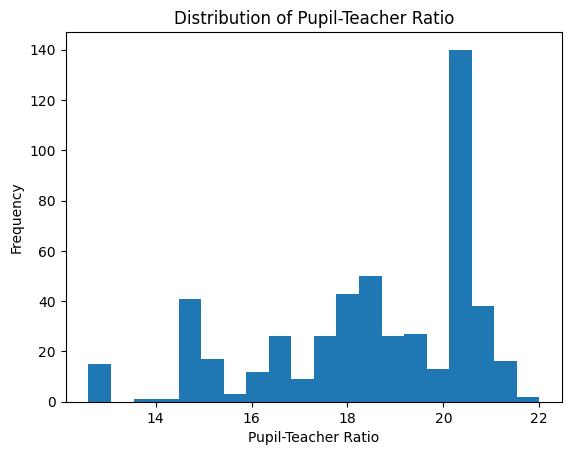

In [11]:
# 5. Create a histogram for the pupil to teacher ratio variable
pyplot.hist(boston_df['PTRATIO'], bins=20)
pyplot.title('Distribution of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

T-statistic: 3.113
P-value: 0.00357


<function matplotlib.pyplot.show(close=None, block=None)>

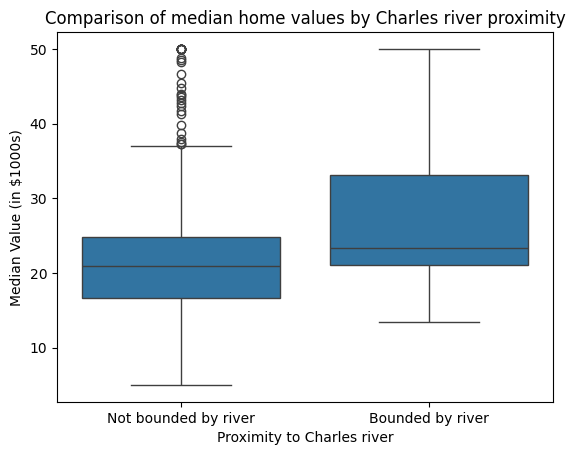

In [14]:
# Q1: Is there a significant difference in median value of houses bounded by the Charles river or not?
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(medv_river, medv_no_river, equal_var=False)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")
# P-value: 0.00357 < 0.05 we reject the null hypothesis
# there is a significant difference in the median value of houses bounded by the Charles river

sns.boxplot(x=boston_df['CHAS'], y=boston_df['MEDV'])
pyplot.title('Comparison of median home values by Charles river proximity')
pyplot.xticks([0, 1], ['Not bounded by river', 'Bounded by river'])
pyplot.xlabel('Proximity to Charles river')
pyplot.ylabel('Median Value (in $1000s)')
pyplot.show

F-statistic: 36.407650
P-value: 0.00000


<function matplotlib.pyplot.show(close=None, block=None)>

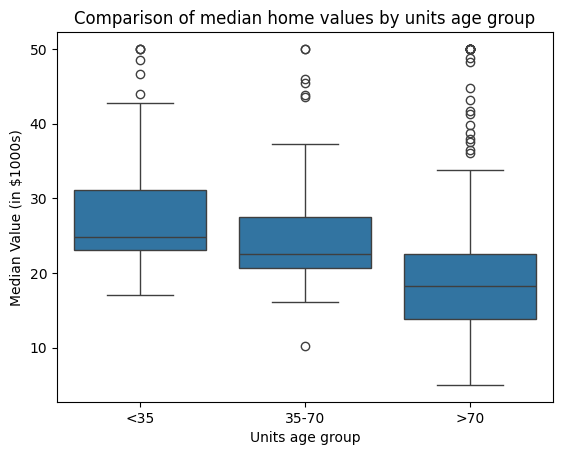

In [17]:
# Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
bins = [0, 35, 70, 100]
labels = ['<35', '35-70', '>70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)
anova_test = stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '<35']['MEDV'], boston_df[boston_df['AGE_GROUP'] == '35-70']['MEDV'], boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV'])
print(f"F-statistic: {anova_test.statistic:3f}")
print(f"P-value: {anova_test.pvalue:.5f}")
# F-statistic: 36.407650, P-value: 0.00000
# There is a significant difference in median values of houses based on the age

sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
pyplot.title('Comparison of median home values by units age group')
pyplot.xlabel('Units age group')
pyplot.ylabel('Median Value (in $1000s)')
pyplot.show

Correlation coefficient: 0.764
P-value: 0.00000


<function matplotlib.pyplot.show(close=None, block=None)>

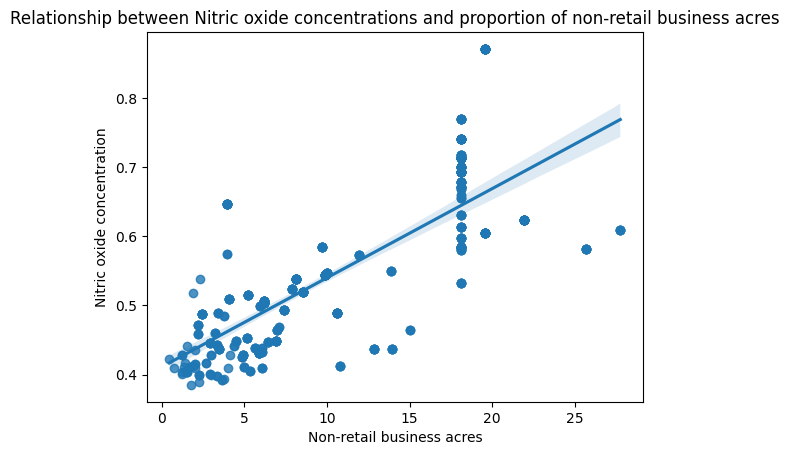

In [18]:
# Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.5f}")
# Correlation coefficient: 0.764, P-value: 0.00000
# No, since p-value is very small there is a significant positive linear relationship, areas with more non-retail business land tend to have higher levels of pollution

sns.regplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('Relationship between Nitric oxide concentrations and proportion of non-retail business acres')
pyplot.xlabel('Non-retail business acres')
pyplot.ylabel('Nitric oxide concentration')
pyplot.show